In [1]:
import pandas as pd
import numpy as np
iris = pd.read_csv('Iris.csv')
iris = iris.drop(columns=['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
iris

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


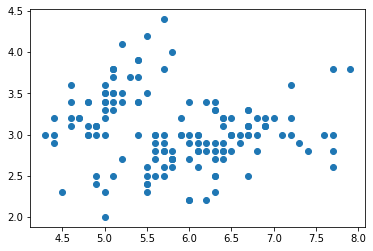

In [2]:
import matplotlib.pyplot as plt
plt.scatter(iris.SepalLengthCm, iris.SepalWidthCm)
plt.show()


In [3]:
def initial_centroids(dataset, k):
    dataset = dataset.to_numpy()
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]
    centroids = centroids.tolist()
    return centroids  

In [4]:
#TEST
centroids = initial_centroids(iris, 4)
centroids

[[5.0, 3.5], [4.8, 3.0], [5.7, 3.0], [6.6, 3.0]]

In [5]:
def get_clusters(dataset, centroids):
    dataset = dataset.to_numpy()
    distances = []
    clusters = []
    for datapoint in dataset:
        for centroid in centroids:
            distances.append(np.linalg.norm(datapoint-centroid))
        clusters.append(centroids.index(centroids[distances.index(min(distances))]))
        distances.clear()
    return clusters  

In [6]:
#TEST
clusters = get_clusters(iris, initial_centroids(iris, 4))
print(clusters)

[2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 1, 3, 1, 0, 2, 3, 2, 2, 1, 1, 3, 2, 3, 2, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 0, 3, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 1, 1, 0, 3, 0, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1]


In [7]:
def get_centroids(dataset, old_clusters, k):
    dataset = (dataset.to_numpy()).tolist()
    new_clusters = {}
    new_centroids = []
    for i in range(k):
        new_clusters[i] = []
    for i, cluster in enumerate(old_clusters):
        new_clusters[cluster].append(dataset[i])
    for i in range(k):
        coordinate = []
        sum_x = 0
        sum_y = 0
        for coord in new_clusters.get(i):
            sum_x += coord[0]
            sum_y += coord[1]
        #edge case = len(new_clusters.get(i)) is 0
        if(len(new_clusters.get(i))) != 0 :
            coordinate.append(sum_x/len(new_clusters.get(i)))
            coordinate.append(sum_y/len(new_clusters.get(i)))
            new_centroids.append(coordinate)
        else:
            new_centroids.append([0,0])
    return new_centroids

In [8]:
collect = get_centroids(iris, get_clusters(iris,initial_centroids(iris,4)), 4)
collect

[[6.292105263157891, 2.978947368421053],
 [6.617647058823529, 2.552941176470588],
 [5.196969696969697, 3.606060606060606],
 [4.7625, 2.8875000000000006]]

In [9]:
def clusters_changed(old_clusters, new_clusters):
    return old_clusters == new_clusters

In [10]:
old = get_clusters(iris, initial_centroids(iris,3))
new = get_clusters(iris, get_centroids(iris, get_clusters(iris,initial_centroids(iris,4)), 4))
clusters_changed(old, new)

False

In [11]:
def k_means_algorithm(dataset, k):
    dataset = dataset.iloc[:,[0,1]]
    new_centroids = initial_centroids(dataset,k)
    no_change = False
    while not no_change:
        old_centroids = new_centroids
        clusters = get_clusters(dataset, old_centroids)
        new_centroids = get_centroids(dataset, clusters, k)
        no_change = clusters_changed(clusters, get_clusters(dataset, new_centroids))
    new_dataset = dataset.copy(deep = True)
    new_dataset.insert(2, "Clusters", get_clusters(dataset, new_centroids))
    new_dataset = new_dataset.sort_values(by = "Clusters")
    new_dataset = new_dataset.reset_index(drop=True)
    return new_dataset

In [12]:
k_means_algorithm(iris, 3)

,SepalLengthCm,SepalWidthCm,Clusters
0,5.9,3.0,0
1,6.0,3.4,0
2,5.4,3.0,0
3,6.0,2.7,0
4,5.8,2.7,0
...,...,...,...
145,6.5,3.0,2
146,7.7,3.8,2
147,7.7,2.6,2
148,6.5,3.0,2


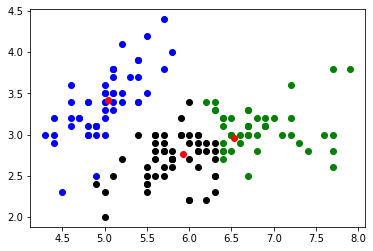

In [13]:
data = k_means_algorithm(iris,3)
c1 = data[data.Clusters==0]
c2 = data[data.Clusters==1]
c3 = data[data.Clusters==2]
plt.scatter(c1.SepalLengthCm, c1.SepalWidthCm, color = "blue")
plt.scatter(c2.SepalLengthCm, c2.SepalWidthCm, color = "green")
plt.scatter(c3.SepalLengthCm, c3.SepalWidthCm, color = "black")
x, y = np.array((get_centroids(iris, data.Clusters, 3))).T
plt.scatter(x,y, c = 'red')


In [14]:
crime_map = pd.read_csv('Crime Data.csv')
crime_map = crime_map.drop(columns=['city_key', 'incident_code', 'incident_date', 'incident_address', 'incident_offense_code', 'incident_offense', 'incident_offense_description', 'incident_offense_detail_description', 'incident_offense_action'])
burglaries = crime_map[crime_map['incident_source_original_type'].str.contains('Burglary')]
locations = burglaries.drop(columns=['city_name','incident_offense_crime_against'])
locations


,incident_latitude,incident_longitude,incident_source_original_type
3,37.781160,-122.461063,Burglary - Commercial
10,37.793050,-122.422871,Burglary - Other
12,37.793050,-122.422871,Burglary - Other
22,37.779829,-122.402841,Burglary - Other
24,37.778946,-122.467354,Burglary - Residential
...,...,...,...
2198,37.775950,-122.422788,Burglary - Other
2217,37.739978,-122.437495,Burglary - Residential
2218,37.739978,-122.437495,Burglary - Residential
2231,37.764188,-122.446074,Burglary - Residential


[[  37.77093618 -122.43311325]
 [  37.76583232 -122.427497  ]
 [  37.7650896  -122.43263969]]


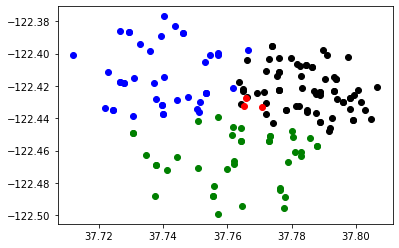

In [15]:
data = k_means_algorithm(locations,3)
c1 = data[data.Clusters==0]
c2 = data[data.Clusters==1]
c3 = data[data.Clusters==2]
plt.scatter(c1.incident_latitude, c1.incident_longitude, color = "blue")
plt.scatter(c2.incident_latitude, c2.incident_longitude, color = "green")
plt.scatter(c3.incident_latitude, c3.incident_longitude, color = "black")
x, y = np.array((get_centroids(locations, data.Clusters, 3))).T
plt.scatter(x,y, c = 'red')
print( np.array((get_centroids(locations, data.Clusters, 3))))

<AxesSubplot:>

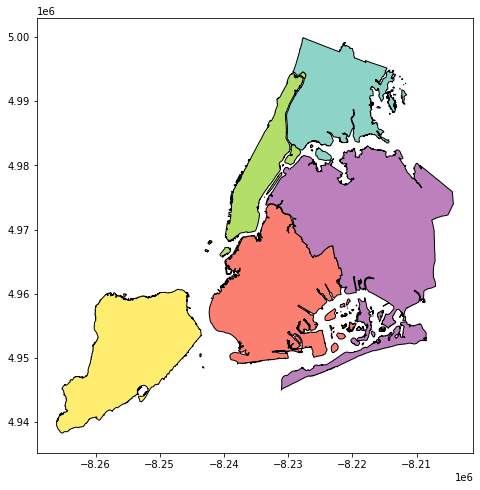

In [26]:
import geopandas as gpd
import datetime
test = gpd.read_file(r'C:\Users\branf\Desktop\Heights and Weights\Geo Data\geo_export_3e51c538-aa74-4bf6-aeae-ce13aca84f87.shp')
fig, ax1 = plt.subplots(figsize = (10,8))
test = test.to_crs(epsg = 3857)
test.plot(ax = ax1, cmap = 'Set3', edgecolor = 'black', column = 'boro_name')



In [53]:
crime_nyc = pd.read_csv('Crime Data NYC.csv', dtype={'PARKS_NM': str})
crime_nyc = crime_nyc.drop(columns=['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_TM', 'CMPLNT_TO_DT','CRM_ATPT_CPTD_CD', 'JURIS_DESC', 'KY_CD', 'PD_CD',
                                    'PD_DESC', 'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC','PREM_TYP_DESC','PARKS_NM','HADEVELOPT','X_COORD_CD',
                                    'Y_COORD_CD','Lat_Lon'])
crime_nyc['RPT_DT'] = pd.to_datetime(crime_nyc['RPT_DT'])
crime_nyc = crime_nyc.dropna()
felonies = crime_nyc[crime_nyc['LAW_CAT_CD'].str.contains('FELONY')]
felonies = crime_nyc[crime_nyc['OFNS_DESC'].str.contains('MURDER')]
mask = (crime_nyc['RPT_DT'] >= pd.Timestamp('2015-01-01')) & (crime_nyc['RPT_DT'] < pd.Timestamp('2015-12-31'))
felonies = (felonies.loc[mask])
felonies['Month'] = felonies.apply(lambda x: x['RPT_DT'].month, axis = 1)
felonies

,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Month
1768,2015-12-30,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.877554,-73.872939,12
2363,2015-12-30,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.852141,-73.922376,12
3583,2015-12-29,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.810877,-73.941064,12
3820,2015-12-28,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.595162,-73.937981,12
3821,2015-12-28,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.595162,-73.937981,12
...,...,...,...,...,...,...,...
475709,2015-01-03,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.677011,-73.898652,1
476657,2015-01-02,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.785565,-73.946142,1
477063,2015-01-02,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.730261,-73.814149,1
477913,2015-01-01,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.826518,-73.818414,1


In [54]:
felonies['Month'].value_counts()
#August contains the most felonies

1     40
5     36
8     35
9     34
10    31
7     31
3     27
6     26
12    25
4     25
11    22
2     18
Name: Month, dtype: int64

In [83]:
secondhalf_murders = felonies.loc[felonies['Month'] >= 6]
secondhalf_murders = secondhalf_murders.sort_values(by=['RPT_DT'])
secondhalf_murders['BORO_NM'].value_counts()

BROOKLYN         96
BRONX            57
MANHATTAN        23
QUEENS           22
STATEN ISLAND     6
Name: BORO_NM, dtype: int64

In [82]:
import plotly.express as px
fig = px.density_mapbox(secondhalf_murders, lat='Latitude', lon='Longitude',
                        mapbox_style="stamen-terrain")
 
fig

In [84]:
bronx_murders = secondhalf_murders[secondhalf_murders['BORO_NM'].str.contains('BRONX')]
bronx_murders

,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Month
283330,2015-06-07,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.887043,-73.854129,6
280146,2015-06-09,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.856033,-73.888449,6
271705,2015-06-16,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.834826,-73.915978,6
258181,2015-06-25,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.840542,-73.862923,6
257436,2015-06-25,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.822759,-73.910483,6
255859,2015-06-26,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.862366,-73.892545,6
247176,2015-07-03,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.826829,-73.925347,7
243468,2015-07-05,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.887314,-73.847272,7
241488,2015-07-07,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.838424,-73.866531,7
240117,2015-07-08,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BRONX,40.875121,-73.908995,7


In [85]:
manhattan_murders = secondhalf_murders[secondhalf_murders['BORO_NM'].str.contains('MANHATTAN')]
manhattan_murders

,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Month
284841,2015-06-06,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.788721,-73.939997,6
267708,2015-06-18,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.799456,-73.966437,6
255456,2015-06-27,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.796790,-73.939404,6
252085,2015-06-29,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.829885,-73.936762,6
232613,2015-07-13,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.789295,-73.940314,7
217126,2015-07-24,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.815670,-73.936569,7
183686,2015-08-16,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.835505,-73.939188,8
176123,2015-08-21,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.804046,-73.936620,8
175721,2015-08-21,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.728251,-74.005374,8
165230,2015-08-28,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,MANHATTAN,40.718564,-73.988201,8


In [86]:
queens_murders = secondhalf_murders[secondhalf_murders['BORO_NM'].str.contains('QUEENS')]
queens_murders

,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Month
290425,2015-06-02,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.695288,-73.814571,6
279044,2015-06-10,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.700602,-73.854566,6
265084,2015-06-20,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.769265,-73.933086,6
254203,2015-06-28,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.672790,-73.773652,6
224157,2015-07-19,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.722654,-73.840434,7
199996,2015-08-05,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.715544,-73.747765,8
196654,2015-08-07,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.701171,-73.835267,8
183561,2015-08-16,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.704518,-73.771337,8
164522,2015-08-29,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.772876,-73.930025,8
162647,2015-08-30,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.595114,-73.759541,8


In [87]:
brooklyn_murders = secondhalf_murders[secondhalf_murders['BORO_NM'].str.contains('BROOKLYN')]
brooklyn_murders

,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Month
290081,2015-06-02,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.683467,-73.948514,6
288363,2015-06-03,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.672296,-73.929406,6
281606,2015-06-08,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.647330,-73.897000,6
278846,2015-06-10,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.670167,-73.930994,6
278640,2015-06-10,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.668884,-73.932506,6
...,...,...,...,...,...,...,...
7331,2015-12-19,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.676052,-73.934611,12
7476,2015-12-19,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.678410,-73.926962,12
4855,2015-12-28,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.612714,-73.961391,12
3821,2015-12-28,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,BROOKLYN,40.595162,-73.937981,12


In [88]:
staten_murders = secondhalf_murders[secondhalf_murders['BORO_NM'].str.contains('STATEN')]
staten_murders

,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Month
224700,2015-07-19,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,STATEN ISLAND,40.615326,-74.099496,7
115185,2015-10-04,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,STATEN ISLAND,40.615423,-74.084350,10
115184,2015-10-04,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,STATEN ISLAND,40.615423,-74.084350,10
42318,2015-11-28,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,STATEN ISLAND,40.640984,-74.086927,11
27978,2015-12-09,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,STATEN ISLAND,40.539296,-74.220783,12
21232,2015-12-14,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,STATEN ISLAND,40.645015,-74.077210,12
